In [5]:
import pandas as pd
import os


In [9]:
current_directory = os.getcwd()
file_path = os.path.join(os.path.dirname(current_directory), 'Dynamic data.xlsx')
df = pd.read_excel(file_path)

      YEARS  WBHP:I1  WBHP:I2  WBHP:I3     WBHP:P1  WBHP:P2  WBHP:P3  \
0  0.000000      0.0      0.0      0.0  240.400772      0.0      0.0   
1  0.002738      0.0      0.0      0.0  159.092148      0.0      0.0   
2  0.007756      0.0      0.0      0.0  151.187546      0.0      0.0   
3  0.018002      0.0      0.0      0.0  141.998734      0.0      0.0   
4  0.035367      0.0      0.0      0.0  134.067154      0.0      0.0   

      WLPR:P1 WLPR:P2  WLPR:P3     WOPR:P1  WOPR:P2  WOPR:P3   WWCT:P1  \
0    0.000000       0      0.0    0.000000      0.0      0.0  0.000000   
1  412.830994       0      0.0  389.604492      0.0      0.0  0.056262   
2  412.830994       0      0.0  361.541779      0.0      0.0  0.124238   
3  412.830994       0      0.0  308.275269      0.0      0.0  0.253265   
4  412.830994       0      0.0  252.686722      0.0      0.0  0.387917   

   WWCT:P2  WWCT:P3  WWIR:I1  WWIR:I2  WWIR:I3  
0      0.0      0.0      0.0      0.0      0.0  
1      0.0      0.0     

In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
# Разделить данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['YEARS', 'WOPR:P1', 'WOPR:P2', 'WOPR:P3'])  # Исключаем столбцы с датой и столбцы WOPR
y = df[['WOPR:P1', 'WOPR:P2', 'WOPR:P3']]  # Здесь y содержит только столбцы WOPR


In [18]:
# Разделить данные на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Создать и обучить модель CatBoost для каждого столбца WOPR
models = []
for i in range(y_train.shape[1]):
    model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', random_state=42)
    model.fit(X_train, y_train.iloc[:, i], eval_set=(X_val, y_val.iloc[:, i]), verbose=False)
    models.append(model)


In [20]:
# Сделать предсказания для валидационной выборки
y_pred = pd.DataFrame()
for i, model in enumerate(models):
    y_pred[f'WOPR:P{i+1}_pred'] = model.predict(X_val)

In [21]:
# Оценить качество модели
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 388.1222622449529


In [22]:
import matplotlib.pyplot as plt

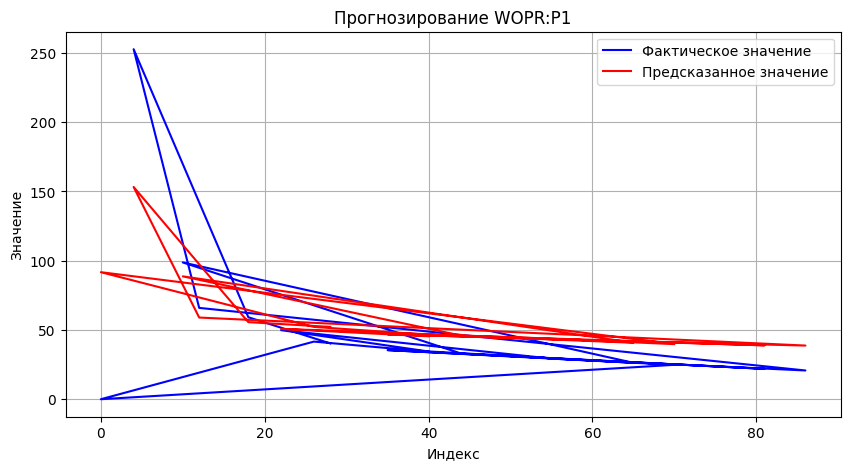

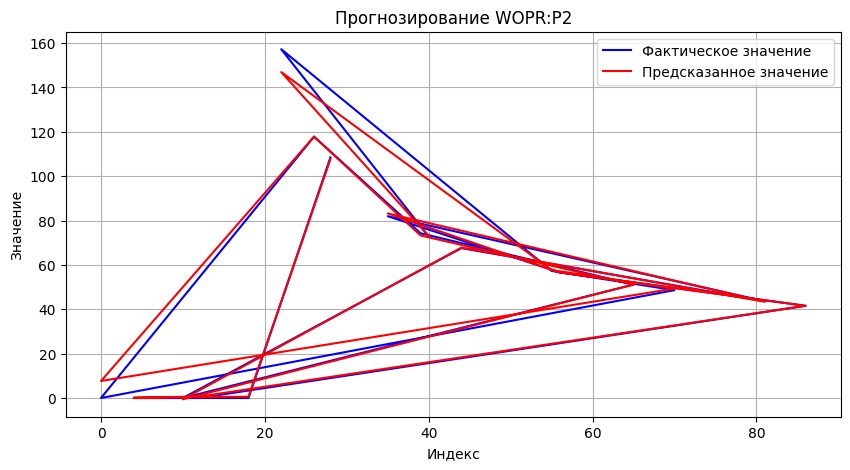

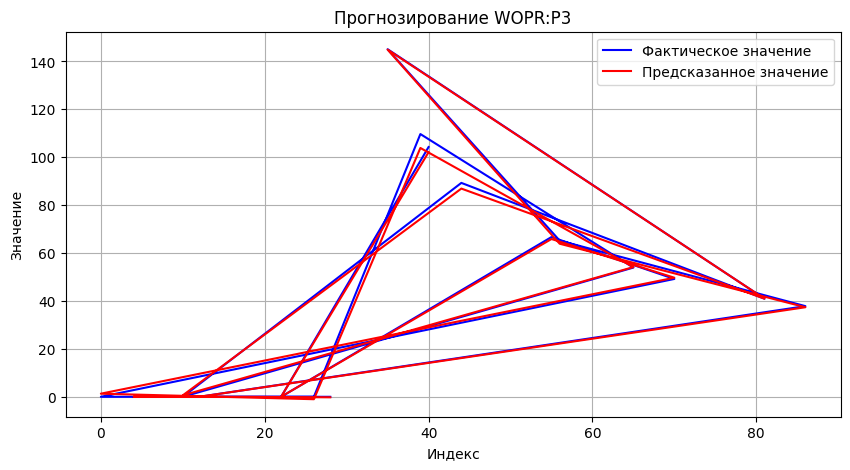

In [23]:
# Вывести графики предсказанных и фактических значений
for i, col in enumerate(y_val.columns):
    plt.figure(figsize=(10, 5))
    plt.plot(y_val.index, y_val[col], label='Фактическое значение', color='blue')
    plt.plot(y_val.index, y_pred[f'WOPR:P{i+1}_pred'], label='Предсказанное значение', color='red')
    plt.title(f'Прогнозирование WOPR:P{i+1}')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
# Определить размеры выборок
test_size = int(0.75 * len(df))
val_size = len(df) - test_size

In [25]:
# Разделить данные на тренировочную и валидационную выборки
X_train = X.iloc[:test_size]
y_train = y.iloc[:test_size]
X_val = X.iloc[test_size:test_size+val_size]
y_val = y.iloc[test_size:test_size+val_size]

In [26]:
# Создать и обучить модель CatBoost для каждого столбца WOPR
models = []
for i in range(y_train.shape[1]):
    model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', random_state=42)
    model.fit(X_train, y_train.iloc[:, i], eval_set=(X_val, y_val.iloc[:, i]), verbose=False)
    models.append(model)

In [27]:
# Сделать предсказания для валидационной выборки
y_pred = pd.DataFrame()
for i, model in enumerate(models):
    y_pred[f'WOPR:P{i+1}_pred'] = model.predict(X_val)

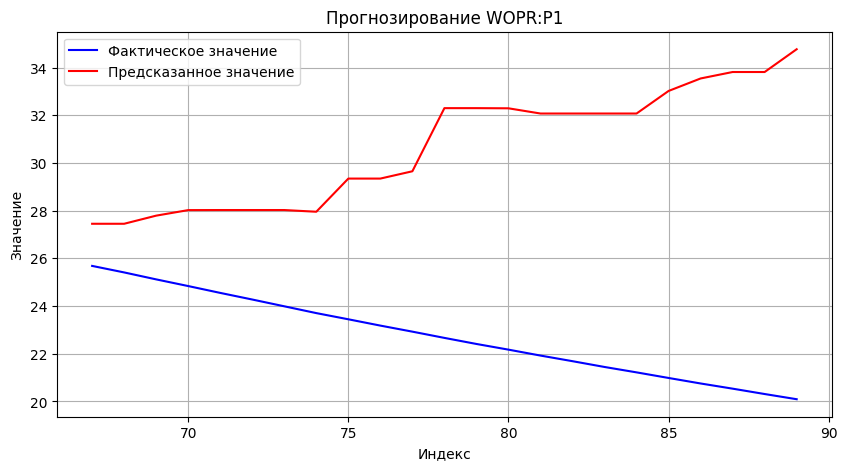

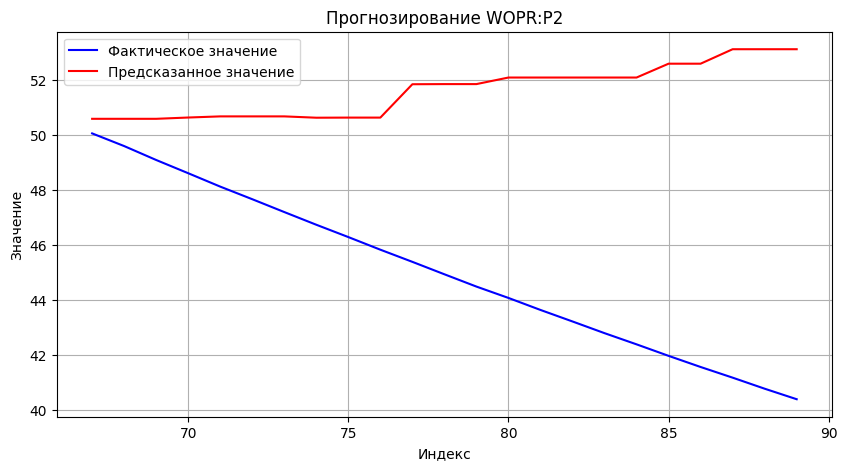

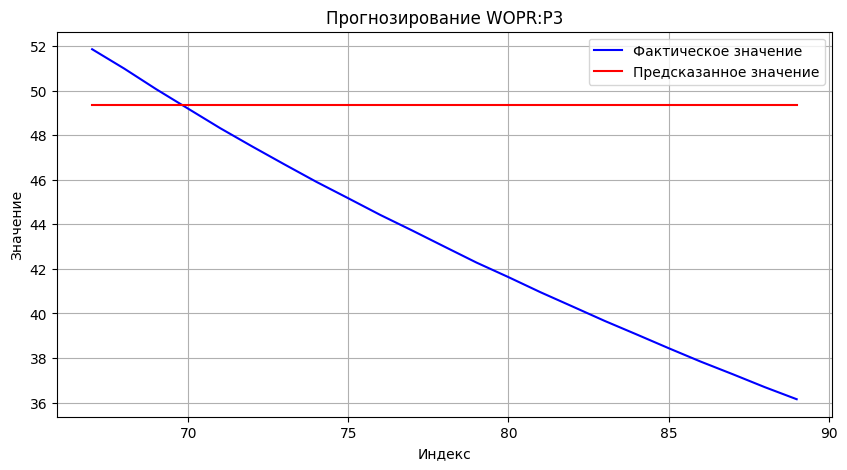

In [28]:
# Вывести графики предсказанных и фактических значений
for i, col in enumerate(y_val.columns):
    plt.figure(figsize=(10, 5))
    plt.plot(y_val.index, y_val[col], label='Фактическое значение', color='blue')
    plt.plot(y_val.index, y_pred[f'WOPR:P{i+1}_pred'], label='Предсказанное значение', color='red')
    plt.title(f'Прогнозирование WOPR:P{i+1}')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [29]:
# Оценить качество модели
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 64.91617448411122
